<p style="background:#eeeeee">
Informática - 1º de Física
<br>
<strong>Introducción a la Programación</strong>
</p>

## Tema 6. Gráficas

Uno de los objetivos principales de la computación científica y del análisis de datos es producir visualizaciones atractivas. 

El mundo del los gráficos por ordenador es inmenso: desde una sencilla representación de funciones hasta los videojuegos con realidad virtual, con imágenes en 2D o 3D, estáticas o interactivas, animaciones y vídeos... las posibilidades son infinitas. 
En el tiempo limitado de que disponemos solo podemos hacer una breve introducción a [matplotlib](https://en.wikipedia.org/wiki/Matplotlib), la principal herramienta de visualización del entorno científico de Python. Aquí hay una [galería](https://matplotlib.org/devdocs/gallery/) con el tipo de gráficas que se pueden crear.

Como ocurre al aprender cualquier herramienta informática, no merece la pena aprender nada de memoria. Lo mejor es preparar una colección de ejemplos de código para resolver las tareas más frecuentes. En caso de duda o para hacer algo nuevo puedes consultar la documentación oficial o buscar directamente en google.

### import

En programas "normales" las gráficas se muestran en ventanas independientes. Más adelante veremos algunos ejemplos. 
En los notebooks se incluyen directamente en el documento. La forma usual de importar el módulo es la siguiente:

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

### plot

El "comando" gráfico fundamental es `plot`. En su forma de uso más común admite como parámetros dos contenedores (típicamente listas o arrays) con las coordenadas $x$ e $y$ de los vértices de una *polilínea*.

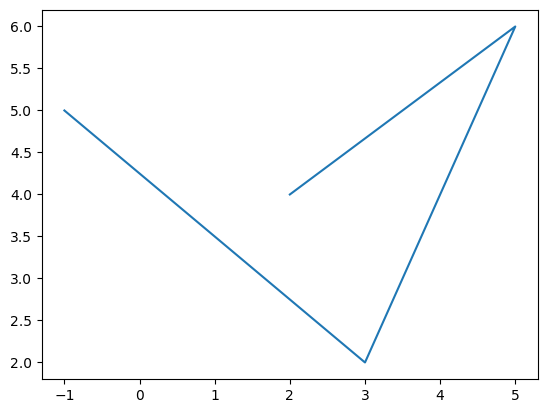

In [2]:
plt.plot([-1, 3, 5, 2], [5, 2, 6, 4])

Muchas gráficas se pueden construir mediante una serie de  comandos plot con diferentes colores, estilos de línea y otras características. Por ejemplo, cuando los vértices están muy próximos podemos conseguir la apariencia de una línea curva. Pero también existen muchos otros comandos gráficos para conseguir prácticamente cualquier efecto que deseemos.

Para representar funciones lo usual es crear un array con una discretización del dominio de interés. Directamente usamos las funciones matemáticas sobre arrays (con prefijo `np.`) para crear las coordenadas requeridas por `plot`.

In [3]:
x = np.linspace(0,2*np.pi,200)
y = np.sin(x)

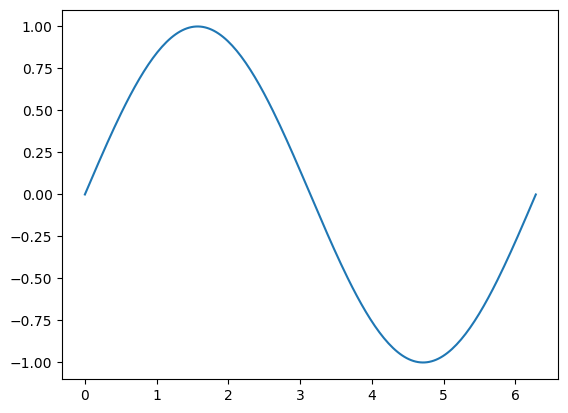

In [4]:
plt.plot(x,y)

Si se omiten las coordenadas $x$ se utilizan los índices de cada elemento.

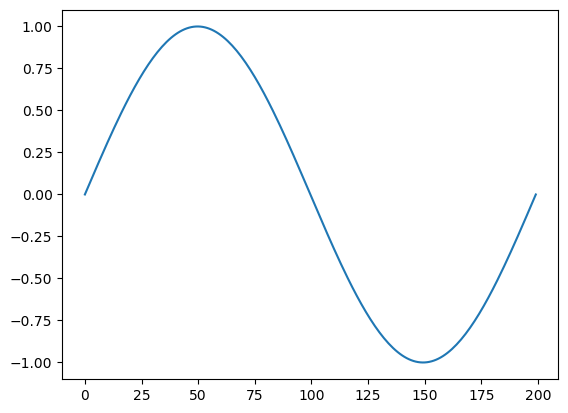

In [5]:
plt.plot(y)

Para que no se muestre la información sobre los objetos gráficos creados ponemos un `;` al final. 

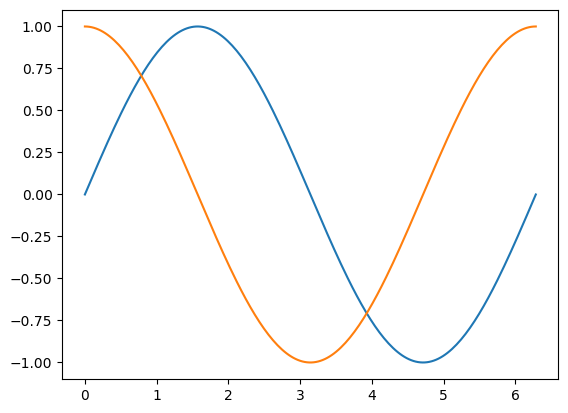

In [6]:
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x));

Como vemos, es posible poner varias parejas de coordenadas x-y para dibujar varias curvas pero es mejor separarlas en múltiples plot.

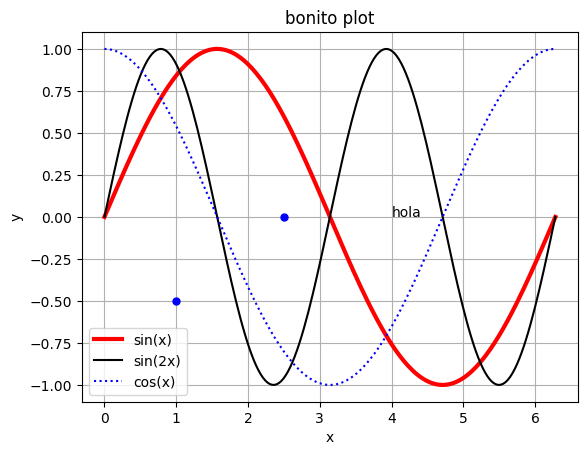

In [7]:
plt.plot(x, np.sin(x),   color='red', lw=3, label='sin(x)')
plt.plot(x, np.sin(2*x), color='black', label='sin(2x)')
plt.plot(x, np.cos(x), color='blue', ls='dotted', label='cos(x)')
plt.plot([1,2.5],[-0.5,0],'.',color='blue',markersize=10);
plt.legend()
plt.grid()
plt.xlabel('x'); plt.ylabel('y'); plt.title('bonito plot');
plt.text(4,0,'hola');
plt.savefig('graphic.pdf')

Comprueba que la figura se ha guardado en la carpeta (con la instrucción `plt.savefig`)

Podemos seleccionar la región de interés del gráfico:

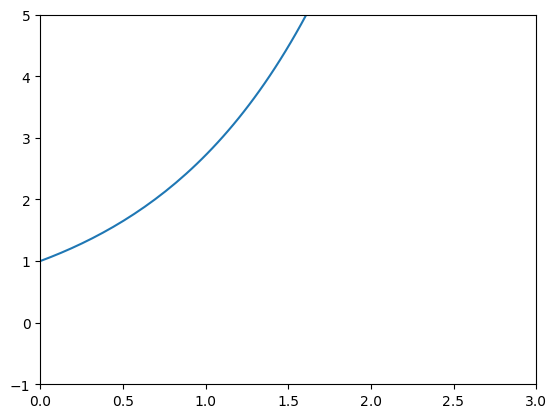

In [8]:
plt.plot(x,np.exp(x));
plt.ylim(-1,5)
plt.xlim(0,3);

Mediante un bucle dibujamos varias funciones en la misma figura:

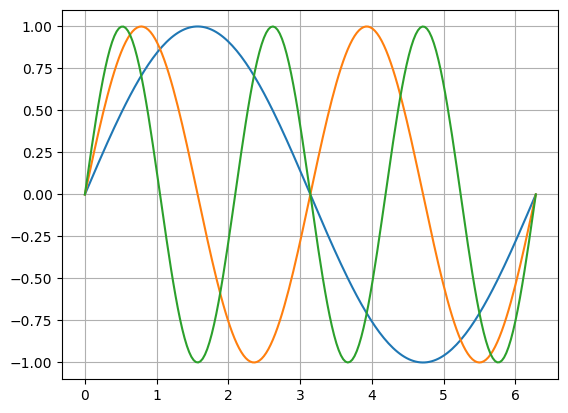

In [9]:
for k in [1,2,3]:
    plt.plot(x,np.sin(k*x))
plt.grid()

Lo mismo en figuras separadas:

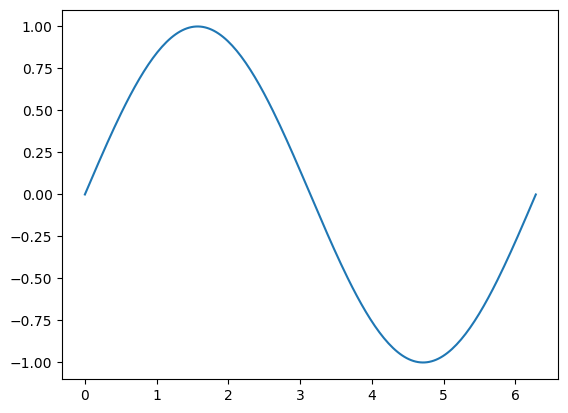

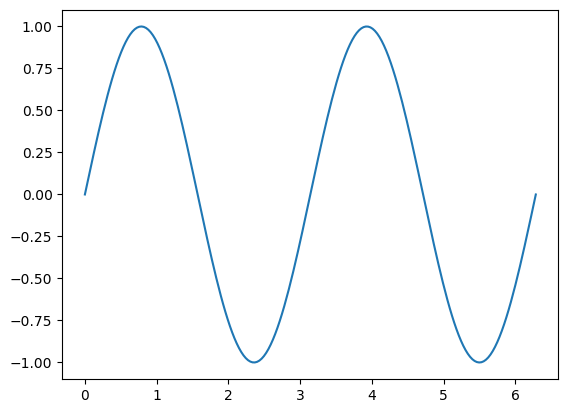

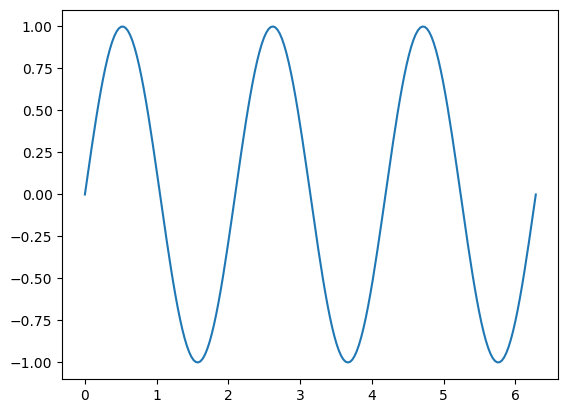

In [10]:
for k in [1,2,3]:
    plt.plot(x,np.sin(k*x))
    plt.show()

Curvas paramétricas:

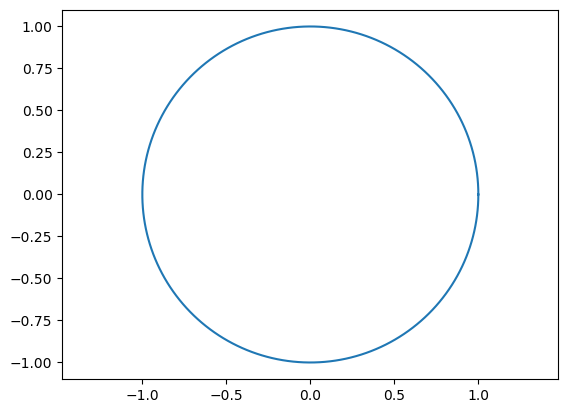

In [11]:
t = np.linspace(0,2*np.pi,200)

xc = np.cos(t)
yc = np.sin(t)

plt.plot(xc,yc)

plt.axis('equal');

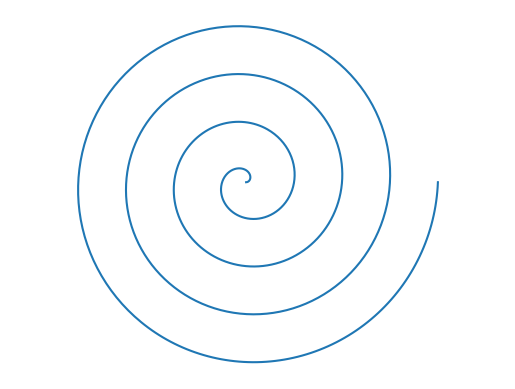

In [12]:
def espiral(n):
    t = np.linspace(0,n*2*np.pi,1000)
    r = 3 * t
    x = r * np.cos(t)
    y = r * np.sin(t)
    plt.plot(x,y)

espiral(4)
plt.axis('equal')
plt.axis('off');

Es fácil representar curvas en el plano complejo separando la parte real e imaginaria:

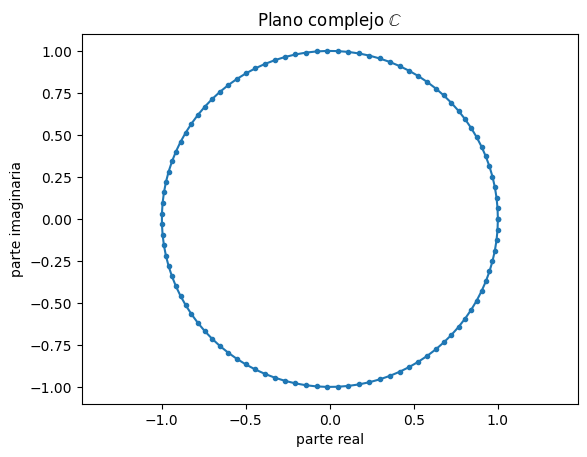

In [13]:
theta = np.linspace(0,2*np.pi,100)
z = np.exp(1j*theta)
plt.plot(np.real(z), np.imag(z), '.-')
plt.axis('equal');
plt.xlabel('parte real'); plt.ylabel('parte imaginaria'); plt.title('Plano complejo $\mathbb{C}$');

Se puede trabajar directamente en coordenadas polares.

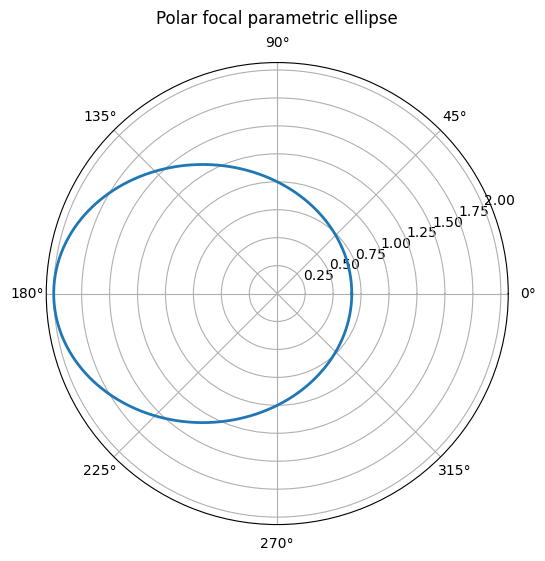

In [14]:
v = np.linspace(0,2*np.pi,1000)
r = 1/(1+0.5*np.cos(v))

plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
ax.plot(v, r, lw=2)
ax.grid(True)
ax.set_title("Polar focal parametric ellipse", va='bottom');

#ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2])  # change radial ticks
#ax.set_rlabel_position(-22.5)    # position of radial labels

Otro ejemplo:

In [15]:
def randwalk(n,s):
    p = s*np.random.randn(n,2)
    r = np.cumsum(p,axis=0)
    x = r[:,0]
    y = r[:,1]
    plt.plot(x,y)

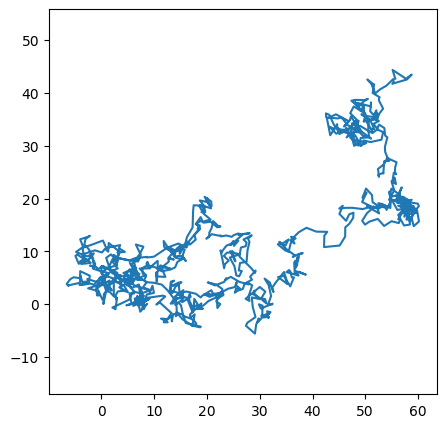

In [16]:
plt.figure(figsize=(5,5))
randwalk(1000,1)
plt.axis('equal');

Varias gráficas en la misma figura:

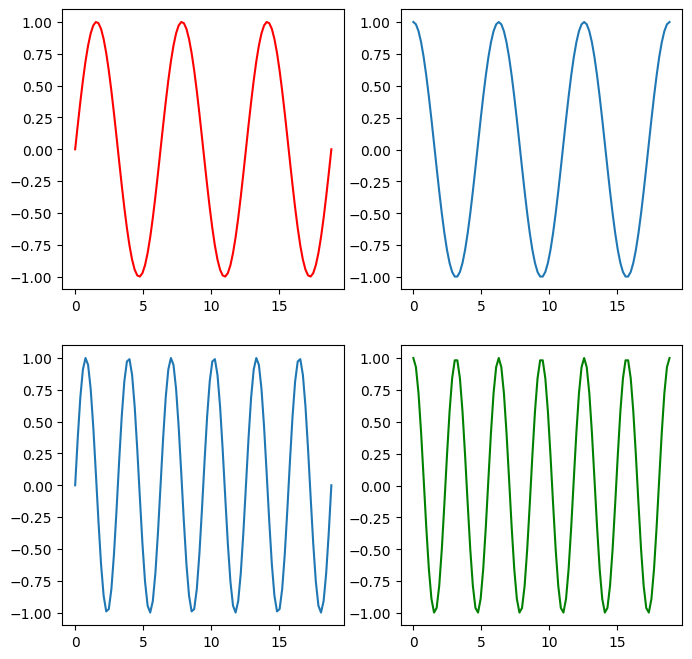

In [17]:
plt.figure(figsize=(8,8))
x = np.linspace(0,6*np.pi,100);

plt.subplot(2,2,1)
plt.plot(x,np.sin(x),color='red')

plt.subplot(2,2,2)
plt.plot(x,np.cos(x))

plt.subplot(2,2,3)
plt.plot(x,np.sin(2*x))

plt.subplot(2,2,4)
plt.plot(x,np.cos(2*x),color='green');

Varias gráficas en la misma figura pero situando los ejes en cualquier posición:

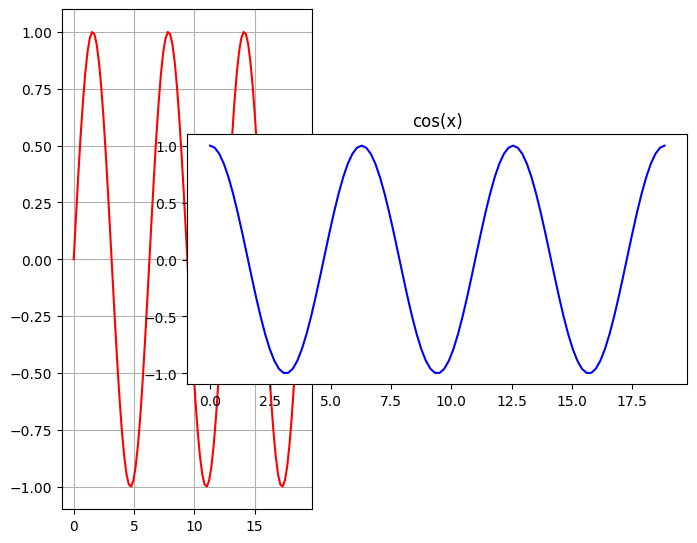

In [18]:
x = np.linspace(0,6*np.pi,100);

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_axes([0,0,0.5,1])
ax1.plot(x,np.sin(x),color='red')
ax1.grid()
ax2 = fig.add_axes([0.25,0.25,1,0.5])
ax2.set_title('cos(x)')
ax2.plot(x,np.cos(x),color='blue');

### fill

Podemos dibujar polígonos rellenos:

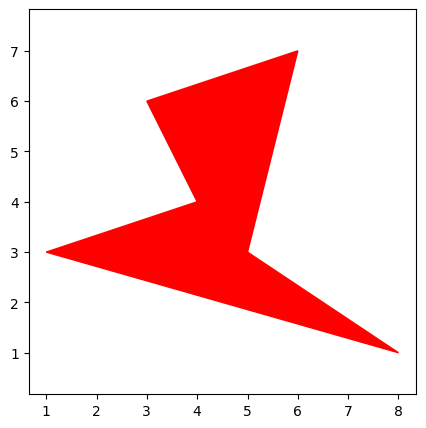

In [19]:
x = [1,4,3,6,5,8]
y = [3,4,6,7,3,1]

plt.figure(figsize=(5,5))
plt.fill(x,y,color='red')
plt.axis('equal');

Los nodos utilizados son:

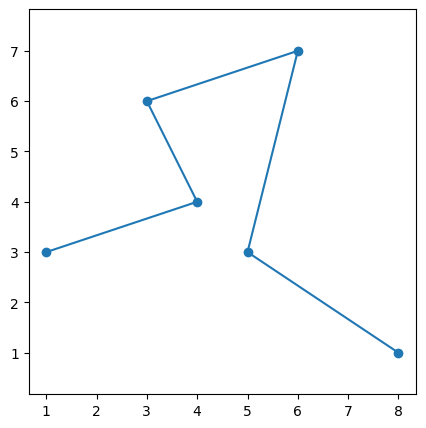

In [20]:
x = [1,4,3,6,5,8]
y = [3,4,6,7,3,1]

plt.figure(figsize=(5,5))
plt.plot(x,y,'o-')
plt.axis('equal');

También tenemos `fill_between`, que rellena el espacio entre dos líneas.

### Anotaciones *

A continuación se muestra el código (simplificado) de un gráfico usado en la presentación de clase. Una vez creado se almacena en un archivo con el formato deseado.

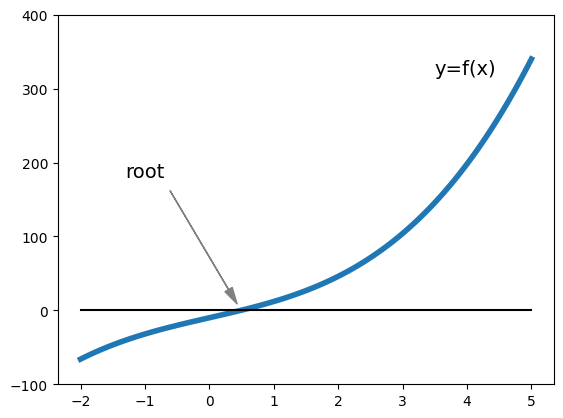

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,5,100)

def f(x):
    y = 2*x**3 + 20 *x - 10
    return y

x_s = 0.49

plt.plot(x,f(x),lw=4);
plt.plot(x,0*x,color='black');
plt.ylim(-100,400)
plt.text(3.5,320,'y=f(x)',fontsize=14)
plt.xticks(np.arange(-2,6))
plt.annotate('root', xy=(x_s,0),  xycoords='data', fontsize=14,
            xytext=(-1, 200), textcoords='data',
            arrowprops=dict(color='gray', shrink=0.05, width=0.1, headwidth=6),
            horizontalalignment='center', verticalalignment='top', 
            );

plt.savefig('newton0.pdf')

### 3D *

In [22]:
import numpy             as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

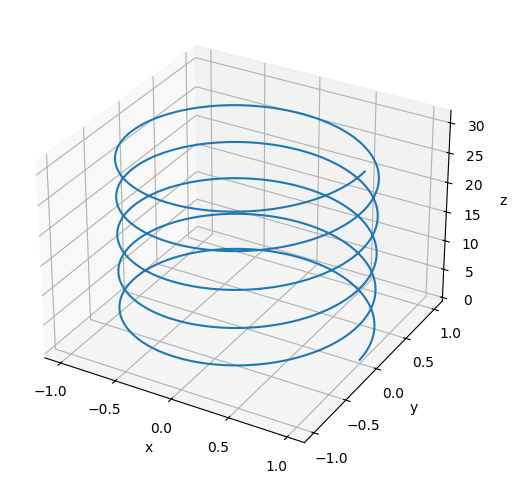

In [23]:
t = np.linspace(0,5*2*np.pi,1000)
x = np.cos(t)
y = np.sin(t)
z = t

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
ax.set_xticks(np.linspace(-1,1,5));
ax.set_yticks(np.linspace(-1,1,5));
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

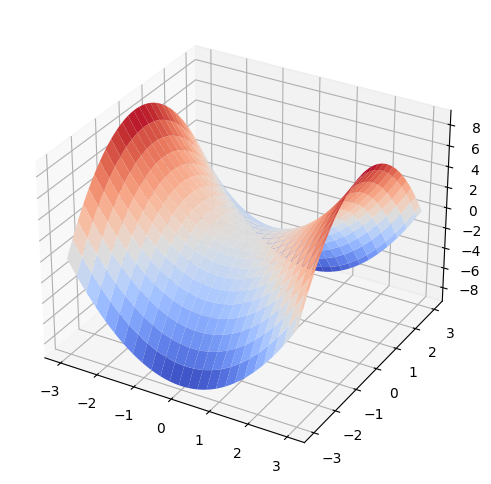

In [24]:
r = np.linspace(-3,3,50)
x,y = np.meshgrid(r,r)

z = x**2-y**2

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0.5, rstride=2, cstride=2);

Otra forma de representar la altura de una superficie es mediante colores:

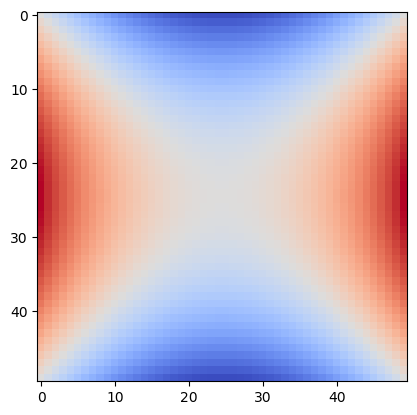

In [25]:
plt.imshow(z,'coolwarm');

O mediante curvas de nivel:

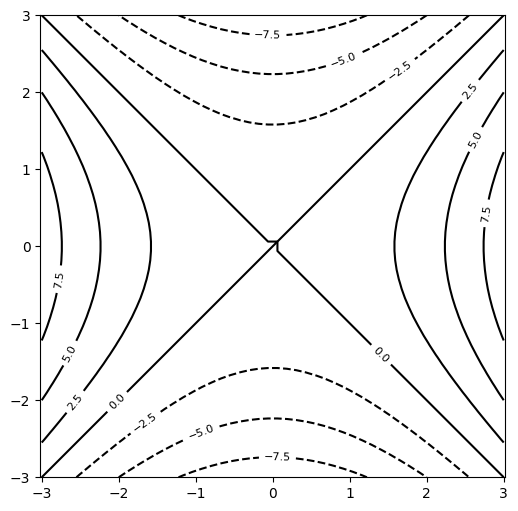

In [26]:
plt.figure(figsize=(6,6))

CS = plt.contour(x,y, z, colors=['black']);
plt.clabel(CS, inline=1, fontsize=8)
plt.axis('equal');

Otro ejemplo.

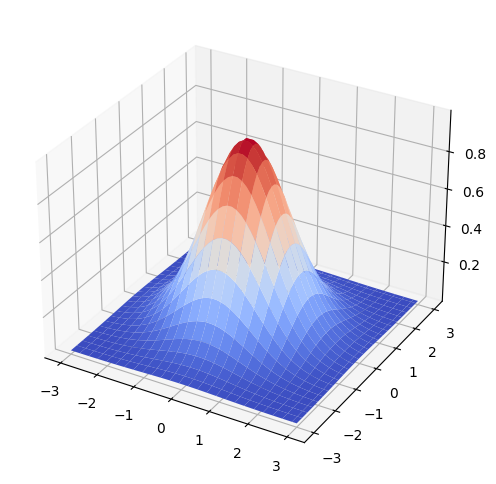

In [27]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

z = np.exp(-0.5*(x**2+y**2))

ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0.5, rstride=2, cstride=2);

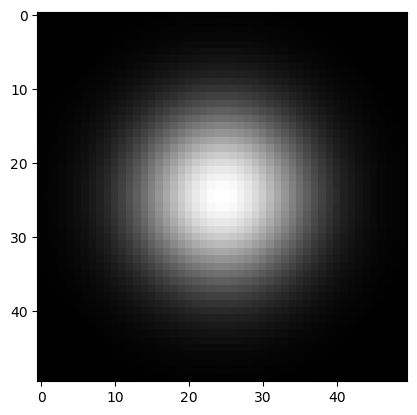

In [28]:
plt.imshow(z,'gray');

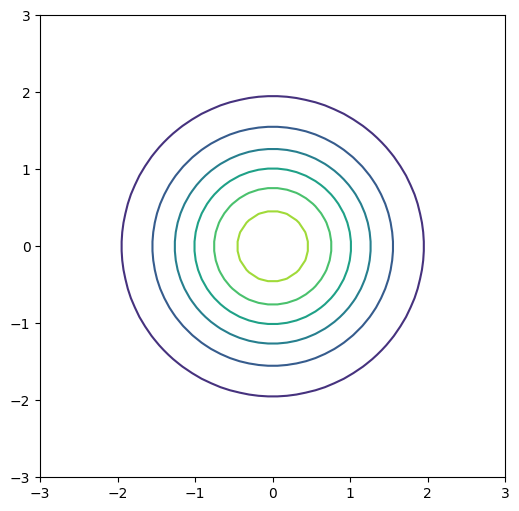

In [29]:
plt.figure(figsize=(6,6))

plt.contour(x,y,z);

Se puede representar cualquier superficie de forma paramétrica. Por ejemplo, una esfera se consigue con coordenadas esféricas:

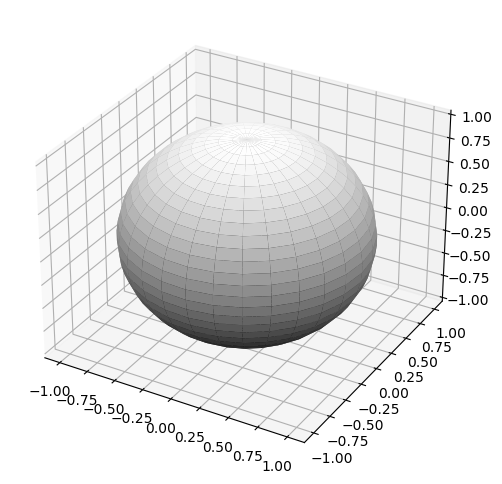

In [30]:
u = np.linspace(0.0, 2.0 * np.pi, 30)
v = np.linspace(0.0, np.pi, 30)
x_0 = np.outer(np.cos(u), np.sin(v))
y_0 = np.outer(np.sin(u), np.sin(v))
z_0 = np.outer(np.ones_like(u), np.cos(v))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_0,y_0,z_0, cmap='gray');

### Interactivo *

In [ ]:
# (necesario solo en jupyterlite)
import sys
if 'pyodide' in sys.modules:
    %pip install ipywidgets

# En jupyterab puede ser necesario instalar este paquete
# !pip install ipywidgets

In [ ]:
from ipywidgets import interact

@interact(freq=(1.,5))
def fun(freq):
    t = np.linspace(0,2*np.pi,1000)
    plt.plot(t,np.sin(freq*t),color='black')
    plt.show()

### Animaciones *

In [ ]:
from matplotlib import animation
from IPython.display import HTML
plt.rc('animation', html='html5')

Las animaciones se construyen definiendo una función que modifica los datos del gráfico en cada fotograma.

In [ ]:
fig = plt.figure()

plt.xlim(( 0, 2*np.pi))
plt.ylim((-1.1, 1.1))
[line] = plt.plot([], [])

plt.close();

x = np.linspace(0,2*np.pi,300)

def fotograma(t):
    line.set_data(x,np.sin(2*x-t*2*np.pi/100))
    return ()

ani = animation.FuncAnimation(fig, fotograma, frames=100, interval=1000/25, blit=True)
HTML(ani.to_jshtml())

In [ ]:
x = np.linspace(0,2,100)

def wave(lam,freq,x,t):
    return 1*np.sin(2*np.pi*(x/lam - t*freq))

fig = plt.figure()
plt.grid()
plt.title('onda viajera')
plt.xlabel('x');
plt.xlim(( 0, 2))
plt.ylim((-1.1, 1.1))

[line1] = plt.plot([], [], color='olive')
[line2] = plt.plot([],[],'.',markersize=15)

plt.close();

lam  = 0.8
freq = 1/4

def animate(i):
    t = i/25
    line1.set_data(x,wave(lam,freq,x,t))
    line2.set_data(1,wave(lam,freq,1,t))
    return ()

ani = animation.FuncAnimation(fig, animate, frames=100, interval=1000/25, blit=True)
HTML(ani.to_jshtml())

In [ ]:
a = np.linspace(0,2*np.pi,1000)

fig = plt.figure(figsize=(6,6))

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x'); plt.ylabel('y')
plt.title('Lissajous')
[line] = plt.plot([], [], color='red', lw=2)
plt.close()

def update(n):
    t = 0.03*n
    x = np.sin(2*a)
    y = np.sin(7*a+t)
    line.set_data(x,y)
    return ()

ani = animation.FuncAnimation(fig, update, frames=120, interval=1000/30, blit=True)
HTML(ani.to_jshtml())

### Estilos *

Hay muchas posibilidades para personalizar el estilo del los gráficos. Incluso es posible simular los [comics xkcd](https://xkcd.com).

In [ ]:
with plt.xkcd():
    plt.plot(np.sin(np.linspace(0, 10)),label='sin')
    plt.title('xkcd style!');
    plt.xlabel('time');
    plt.ylabel('amplitude')
    plt.legend();

In [ ]:
plt.style.use('seaborn')

plt.plot(np.sin(np.linspace(0, 10)));

In [ ]:
plt.style.use('default')

### YouTube *

In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
YouTubeVideo('p7bzE1E5PMY')

### Audio *

### Gráficos interactivos

In [ ]:
# (necesario solo en jupyterlite)
import sys
if 'pyodide' in sys.modules:
    %pip install ipympl

%matplotlib widget

In [ ]:
r = np.linspace(-3,3,50)
x,y = np.meshgrid(r,r)

z = x**2-y**2

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0.5, rstride=2, cstride=2);

In [ ]:
# para volver a la normalidad
%matplotlib inline